In [1]:
# Roger H Hayden III
# Project 4 - Interactive Graphical Neural Network
# 10/27/2022
# Johns Hopkins University

In [69]:
import networkx as nx 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

# Attempted with Grey's Anatomy Data

Loaded Data

In [3]:
df = []

df = pd.read_csv(r'C:\Users\roger\OneDrive\Desktop\Datasets\GreysRelationshipTable.csv')
print(df)

          from           to marital_status cosmo_rank
0         lexi        sloan      unmarried          4
1         lexi        karev      unmarried         24
2         owen         yang        married          2
3         owen       altman      unmarried         26
4        sloan       torres      unmarried          5
5        sloan       altman      unmarried         13
6       torres      arizona        married         14
7       torres        karev      unmarried         na
8        derek         grey        married          1
9        karev        izzie        married          9
10     omalley        izzie      unmarried         31
11      torres      omalley        married          3
12        yang        colin      unmarried         na
13        yang      preston      unmarried         29
14       karev       kepner      unmarried         39
15       sloan      addison      unmarried         15
16       karev      addison      unmarried         32
17       derek      addison 

Assign the Edges

In [4]:
edges = df[['from', 'to']]
edges

,from,to
0,lexi,sloan
1,lexi,karev
2,owen,yang
3,owen,altman
4,sloan,torres
5,sloan,altman
6,torres,arizona
7,torres,karev
8,derek,grey
9,karev,izzie


Set the Edge List to Create the Network

In [5]:
GA = nx.from_pandas_edgelist(edges, source="from", target="to")

In [6]:
# 31 Nodes, 34 Edges
print(nx.info(GA))

Graph with 31 nodes and 34 edges


C:\Users\roger\AppData\Local\Temp/ipykernel_19916/4155896082.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(GA))


Initial Graph Produced
- This is the regular output that is produced from the nx.draw function with only specifying to use labels

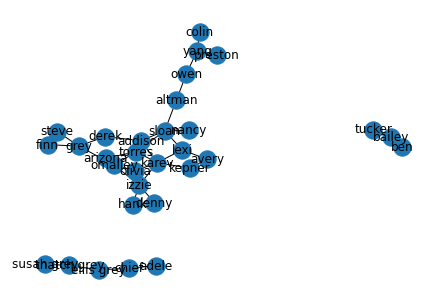

In [7]:
# First Graph
# Note: each time this is ran it will look different unless this specific output is assigned
nx.draw(GA, with_labels = True)

Second Representation of the Grey's Dataset
- In this representation of the dataset I made changes to the font and node size
- I attempted to do this to see if I could get the proportions of the font and nodes to match better

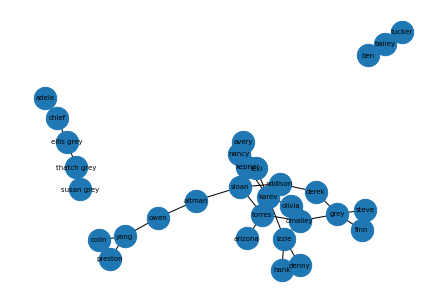

In [8]:
# Visualization 2
nx.draw(GA, with_labels = True, font_size=7, node_size = 500)

# Manually Created Network Graph

Manually Created Nodes and Weights
- Based on the code found at: https://networkx.org/documentation/stable/auto_examples/drawing/plot_weighted_graph.html

In [32]:
G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)
G.add_edge("a", "q", weight=0.9)
G.add_edge("q", "r", weight=0.3)
G.add_edge("r", "s", weight=0.1)
G.add_edge("p", "q", weight=0.7)
G.add_edge("p", "r", weight=0.1)
G.add_edge("q", "c", weight=0.3)
G.add_edge("s", "z", weight=0.1)
G.add_edge("z", "h", weight=0.5)
G.add_edge("h", "i", weight=0.9)
G.add_edge("i", "h", weight=0.3)
G.add_edge("i", "z", weight=0.4)
G.add_edge("h", "t", weight=0.3)
G.add_edge("t", "i", weight=0.9)
G.add_edge("y", "z", weight=0.3)
G.add_edge("h", "y", weight=0.1)
G.add_edge("h", "z", weight=0.7)
G.add_edge("t", "z", weight=0.1)
G.add_edge("s", "t", weight=0.3)
G.add_edge("g", "h", weight=0.3)
G.add_edge("j", "g", weight=0.1)
G.add_edge("k", "g", weight=0.7)
G.add_edge("t", "k", weight=0.1)
G.add_edge("j", "k", weight=0.3)
G.add_edge("l", "s", weight=0.1)
G.add_edge("l", "y", weight=0.3)
G.add_edge("m", "z", weight=0.1)
G.add_edge("n", "m", weight=0.7)
G.add_edge("o", "n", weight=0.8)
G.add_edge("o", "m", weight=0.6)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

print(nx.info(G))

Graph with 22 nodes and 33 edges


C:\Users\roger\AppData\Local\Temp/ipykernel_19916/3289759661.py:44: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


Degree Analysis - Visualization 1 (Viz 4 on my Report)
- I provided a degree analysis to show that there are differening degrees between all the nodes and all of them do not have the same degree
- Source: https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree.html

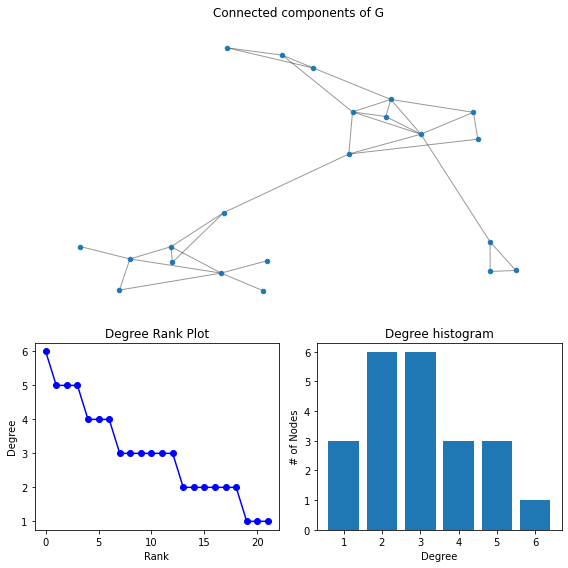

In [71]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=7)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

Visualizing the Graph (Viz 2 on Report)
- Used the Link above for the first graph of choice

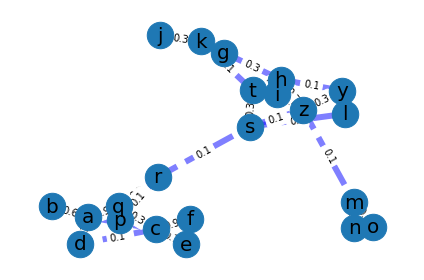

In [66]:
# Collecting Nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# Collecting Edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# Collecting Node Labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

# Collecting Edge Weights
edge_labels = nx.get_edge_attributes(G, "weight")

# Drawing Edge Labels
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

Visualization 3
- I took some of the techniques used in the first visualization to try to make it a little easier to follow 
- Removed the edge labels
- Shrunk the edge labels

By doing this all I believe it is a little easier to see the network for how it is without the additional information, we are able to see what nodes seem more grpuped together versus ones that are not

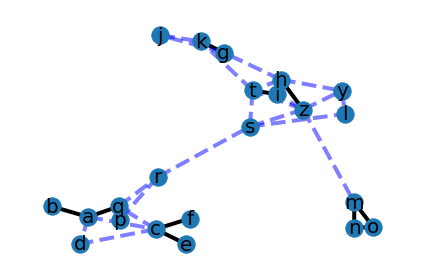

In [62]:
# Collecting Nodes
nx.draw_networkx_nodes(G, pos)

# Collecting Edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=4)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=4, alpha=0.5, edge_color="b", style="dashed"
)

# Collecting Node Labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

#Collecting Edge Information
edges = nx.get_edge_attributes(G, "weight")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

Visualization 4
- For this I selected only the "esmall" edges and the "elarge" edges seperately to see how the graphs would look

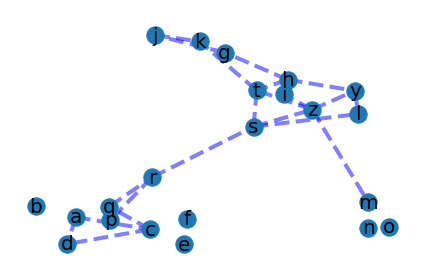

In [64]:
#### ESMALL ####

# Collecting Nodes
nx.draw_networkx_nodes(G, pos)

# Collecting Edges
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=4, alpha=0.5, edge_color="b", style="dashed"
)

# Collecting Node Labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

#Collecting Edge Information
edges = nx.get_edge_attributes(G, "weight")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

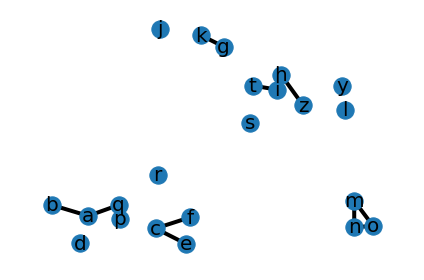

In [65]:
#### ELARGE ####

# Collecting Nodes
nx.draw_networkx_nodes(G, pos)

# Collecting Edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=4)

# Collecting Node Labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

#Collecting Edge Information
edges = nx.get_edge_attributes(G, "weight")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

Visualization 5

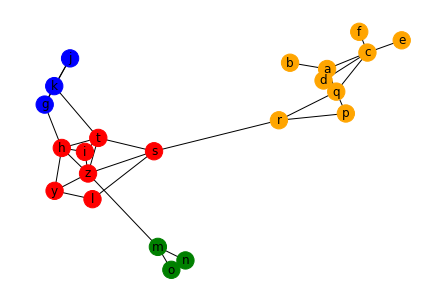

In [94]:
Nodes1 = ['a','b','c','d','e','f','q','p','r']
Nodes2 = ['y','l','z','h','i','t','s']
Nodes3 = ['m','n','o']

color_map = []
for node in G:
    if node in Nodes1:
        color_map.append('orange')
    elif node in Nodes2:
        color_map.append('red')
    elif node in Nodes3:
        color_map.append('green')
    else:
        color_map.append('blue')

nx.draw(G, with_labels = True, node_color = color_map)

Edge List and Adjacency Matrix
- In this portion I review the Edge List and Adjacency Matrix
- I print the results of the Adjacency Matrix to Excel

In [74]:
nx.to_pandas_edgelist(G)

,source,target,weight
0,a,b,0.6
1,a,c,0.2
2,a,d,0.3
3,a,q,0.9
4,c,d,0.1
5,c,e,0.7
6,c,f,0.9
7,c,q,0.3
8,q,r,0.3
9,q,p,0.7


In [77]:
df = nx.to_pandas_adjacency(G)
df

,a,b,c,d,e,f,q,r,s,p,...,i,t,y,g,j,k,l,m,n,o
a,0.0,0.6,0.2,0.3,0.0,0.0,0.9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c,0.2,0.0,0.0,0.1,0.7,0.9,0.3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
d,0.3,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
e,0.0,0.0,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q,0.9,0.0,0.3,0.0,0.0,0.0,0.0,0.3,0.0,0.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
r,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.1,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,...,0.0,0.3,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0
p,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
# Printing adjacency matrix to my desktop excel file
#df.to_excel(excel_writer = "C:/Users/roger/Onedrive/Desktop/Hayden_Project4_Adjacency_Matrix.xlsx")